<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Konten

1. Deskripsi Project


2. Pengolahan Data 
	
    2.1 Persiapan Datasets 

	2.2 Perhitungan Metrik 
		
		2.2.1 Perhitungan Mettrik Untuk Produk
		
		2.2.2 Perhitungan Metrik Untuk Penjualan

		2.2.3 Perhitungan Metrik Untuk Pemasaran

3. Kesimpulan

# Deskripsi Project 

Project ini bertujuan untuk membantu perusahaan mengoptimalkan anggaran biaya pemasaran. Adapun tujuan dari project ini ialah :

1. Mengetahui bagaimana para pengguna menggunakan produk perusahaan 

2. Mengetahui kapan para pengguna mulai melakukan pembelian 

3. Mengetahui berapa jumlah pendapatan yang diperoleh perusahaan dari setiap pengguna

4. Mengetahui kapan semua biaya pemasaran terbayarkan 

# Pengolahan Data

# Persiapan Datasets

In [162]:
import pandas as pd 
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import seaborn as sns 
from IPython.display import display

# Datasets Visits

In [163]:
visits = pd.read_csv('/datasets/visits_log_us.csv')

In [164]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [165]:
visits.sample()

,Device,End Ts,Source Id,Start Ts,Uid
83522,desktop,2017-12-03 20:02:00,3,2017-12-03 19:57:00,824786890904231672


In [166]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [167]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [168]:
visits.duplicated().sum()

0

In [169]:
time_check = visits.query("`End Ts` < `Start Ts`")
time_check

,Device,End Ts,Source Id,Start Ts,Uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Kesimpulan sementara:
1. Ruang penyimpanan data visits cukup besar. Mungkin hal ini disebabkan oleh tipe data pada kolom End Ts dan Start Ts yang tidak sesuai 
2. Datasets visits tidak memiliki missing value 
3. Datasets visits tidak memiliki duplikasi 
4. Format penulisan nama kolom datasets masih mengandung huruf kapital dan spasi
5. Terdapat anomali data pada kolom End Ts dan Start Ts dimana waktu mulai lebih besar dari pada waktu berakhir
6. Data pada kolom Device dapat dioptimalkan

Hal yang akan dilakukan 
1. mengubah tipe data kolom Device menjadi category
2. mengubah tipe data kolom End Ts dan Start Ts menjadi tipe data waktu dan tanggal 
3. menyamakan bentuk penulisan nama kolom 
4. melakukan perbaikan pada data anomali 

In [170]:
#optimalisasi tipe data device menjadi kategori dan data kolom End Ts dan Start Ts menjadi datetime
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['Start Ts','End Ts'])
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Setelah melakukan konversi tipe data, ruang penyimpanan yang digunakan datasets visits berkurang 68 MB. 

In [171]:
#memperbaiki gaya penulisan nama kolom 
visits = visits.rename(columns={'Device':'device','End Ts': 'end_ts','Source Id':'source_id','Start Ts':'start_ts','Uid':'uid'})
visits.sample()

,device,end_ts,source_id,start_ts,uid
331798,desktop,2017-06-09 16:21:00,5,2017-06-09 16:13:00,16600360365445076973


In [172]:
#memperbaiki anomali pada kolom end_ts dan start_ts
visits = visits.query("`start_ts` <= `end_ts`").reset_index(drop=True)

In [173]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  category      
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


# Datasets Orders

In [174]:
orders = pd.read_csv('/datasets/orders_log_us.csv')

In [175]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [176]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [177]:
orders.duplicated().sum()

0

Berdasarkan hasil informasi data dapat diketahui
1. besar penyimpanan untuk datases orders ialah 4.4 mb 
2. gaya penulisan nama kolom memiliki huruf kapital didepannya 
3. tipe data kolom Buy Ts adalah object 
4. tidak ada missing value
5. tidak ada duplikasi 

Hal yang dilakukan 
1. konversi data kolom Buy Ts menjadi tipe data waktu dan tanggal 
2. menyamakan gaya penulisan nama kolom 

In [178]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In [179]:
orders = orders.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'renevue','Uid':'uid'})
orders.sample()

,buy_ts,renevue,uid
1500,2017-06-16 09:20:00,0.24,14406814968226835822


In [180]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   renevue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Berdasarkan hasil konversi, dapat dilihat bahwa ruang penyimpanan untuk datasets orders berkurang menjadi 1.2 MB

# Datasets Costs

In [181]:
costs = pd.read_csv('/datasets/costs_us.csv')

In [182]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [183]:
costs.sample()

,source_id,dt,costs
1887,9,2017-08-11,11.36


Berdasarkan hasil informasi, dapat diketahui bahwa data kolom dt tidak memiliki tipe data yang benar. Hal yang akan dilakukan adalah konversi data kolom dt menjadi tipe data tanggal. Selain itu ruang penyimpanan yang dibutuhkan datasets costs ialah 206.2 KB serta tidak ada missing value 

In [184]:
costs['dt'] = pd.to_datetime(costs['dt'], format= '%Y-%m-%d')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Setalah melakukan konversi dapat dilihat ruang penyimpanan datasest costs berkurang menjadi 59.7 KB

# Perhitungan Metrik

# Perhitung Metrik Untuk Produk

Hal yang akan dijawab untuk perhitungan metrik produk:
   1. Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
   2. Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi).
   3. Berapa lama durasi untuk setiap sesi?
   4. Seberapa sering pengguna kembali untuk menggunakan produk?

# Jumlah pengguna yang menggunakan produk pada kurun waktu tertentu

In [185]:
orders['purchase_year'] = orders['buy_ts'].dt.year
orders['purchase_month'] = orders['buy_ts'].dt.month
orders['purchase_week'] = orders['buy_ts'].dt.week
orders['purchase_date'] = orders['buy_ts'].dt.date

/tmp/ipykernel_27/4217537743.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  orders['purchase_week'] = orders['buy_ts'].dt.week


In [186]:
orders.head()

,buy_ts,renevue,uid,purchase_year,purchase_month,purchase_week,purchase_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01


In [187]:
orders['purchase_year'].value_counts()

2017    27467
2018    22948
Name: purchase_year, dtype: int64

In [188]:
#pengguna tahun 2017 
orders_2017 = orders.query('purchase_year==2017')
orders_2017.sample()

,buy_ts,renevue,uid,purchase_year,purchase_month,purchase_week,purchase_date
19351,2017-11-24 15:43:00,0.67,12405717606948092441,2017,11,47,2017-11-24


In [189]:
#pengguna aktif per hari 2017 
dau_2017 = orders_2017.groupby('purchase_date').agg({'uid':'nunique'}).mean()
int(dau_2017)

118

In [190]:
orders_2017.groupby(orders_2017['purchase_date'])['uid'].nunique().sort_values(ascending=False).head()

purchase_date
2017-11-24    701
2017-10-06    340
2017-11-25    313
2017-12-26    253
2017-10-03    247
Name: uid, dtype: int64

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Harian 2017')

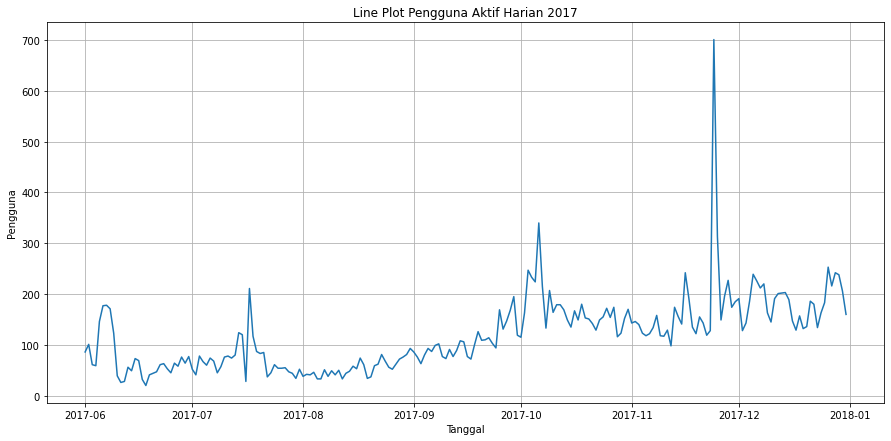

In [191]:
plt.figure(figsize=(15,7))
orders_2017.groupby(orders_2017['purchase_date'])['uid'].nunique().plot(grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Harian 2017')

Secara rata-rata jumlah pengguna aktif harian pada tahun 2017 adalah 118 pengguna. Berdasarkan gambaran sebaran pengguna, dapat dilihat bahwa pada tanggal 24 November 2017 mencatat jumlah pengguna terbanyak sepanjang tahun yakni mencapai 700 pengguna. 

In [192]:
#pengguna aktif per minggu 2017 
wau_2017 = orders_2017.groupby(['purchase_year','purchase_week']).agg({'uid':'nunique'}).mean()
int(wau_2017)

760

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Perminggu 2017')

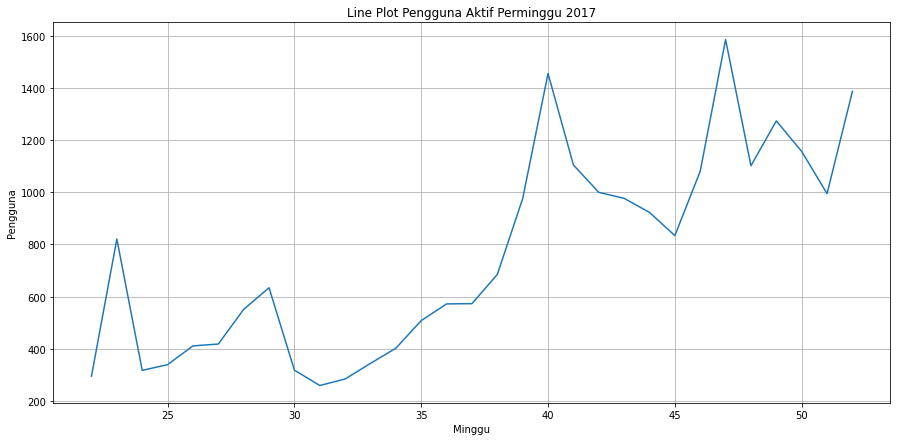

In [193]:
plt.figure(figsize=(15,7))
orders_2017.groupby(orders_2017['purchase_week'])['uid'].nunique().plot(grid=True)
plt.xlabel('Minggu')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Perminggu 2017')

Secara rata-rata jumlah pengguna aktif perminggu pada tahun 2017 adalah 760 pengguna. Berdasarkan gambaran sebaran pengguna, dapat dilihat bahwa jumlah pengguna aktif tertinggi yang tercatat ialah hampir 1600 pengguna. 

Secara umum jumlah pengguna aktif mengalami trend naik. Namun, terdapat hal yang menarik dari perjalanan grafik ini yang perlu diketahui lebih dalam 
1. pada waktu dimana jumlah pengguna mencapai titik tertinggi akan selalu diikuti dengan penurunan yang signifikan dan ini berulang. Analis menganggap ini menjadi sebuah pola. Sehingga hal apa yang dilakukan  perusahaan atau terjadi di lapangan yang membuat grafik naik dan jatuh signifikan?

2. apa yang dilakukan oleh perusahaan pada periode minggu ke 30 - 40 yang menyebabkan jangka waktu peningkatan panjang ?

In [194]:
#pengguna aktif per bulan 2017 
mau_2017 = orders_2017.groupby(['purchase_year','purchase_month']).agg({'uid':'nunique'}).mean()
int(mau_2017)

3199

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Perbulan 2017')

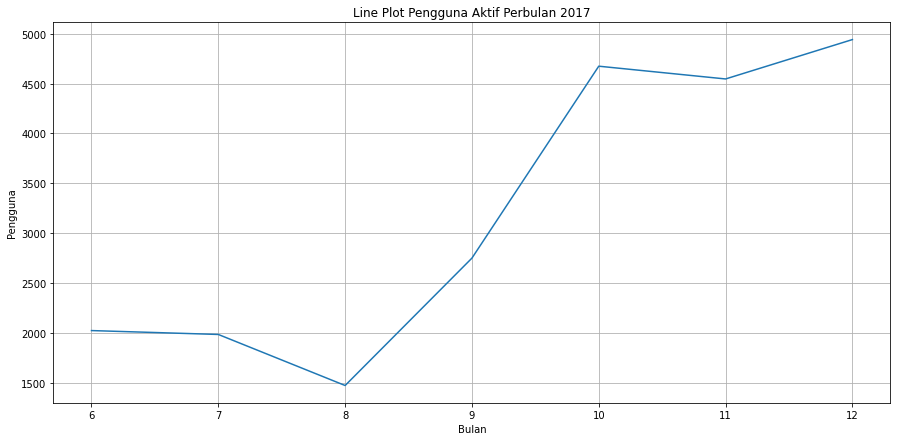

In [195]:
plt.figure(figsize=(15,7))
orders_2017.groupby(orders_2017['purchase_month'])['uid'].nunique().plot(grid=True)
plt.xlabel('Bulan')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Perbulan 2017')

Berdasarkan hasil perhitungan MAU, dapat dikethaui bahwa terdapat 3199 pengguna aktif dalam sebulan yang menggunakan produk perusahaan. Lebih lanjut dalam 6 bulan sejak prdouk diluncurkan perusahaan, secara umum grafik pengguna produk tersebut mengalami peningkatan. Peningkatan sangat pesat terjadi pada bulan ke 8 hingga 10. Pada akhir tahun jumlah pengguna produk aktif berada di hampir 5000 pengguna

In [196]:
#pengguna tahun 2018 
orders_2018 = orders.query('purchase_year==2018')

In [197]:
#pengguna aktif harian
dau_2018 = orders_2018.groupby('purchase_date').agg({'uid':'nunique'}).mean()
int(dau_2018)

141

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Harian 2018')

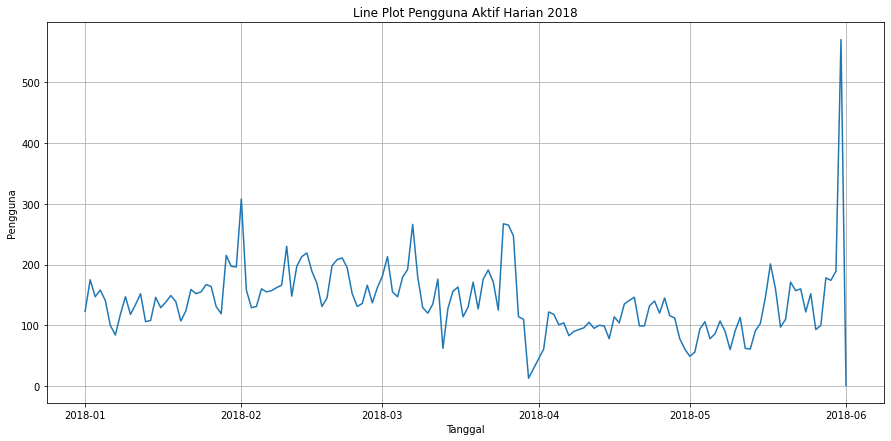

In [198]:
plt.figure(figsize=(15,7))
orders_2018.groupby(orders_2018['purchase_date'])['uid'].nunique().plot(grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Harian 2018')

Secara rata-rata jumlah pengguna aktif dalam 1 hari setara dengan 141 pengguna. Berdasarkan grafik persebaran pengguna aktif harian yang ditampilkan, terdapat hal menarik yang perlu dilakukan analisa lebih lanjut yaitu apa yang terjadi di lapangan atau hal apa yang dilakukan oleh perusahaan sehingga pada periode menjelang bulan-6 mengalami peningkatan signifkan serta penurunan drastis. Apakah terdapat program diskon besar-besaran ?

In [199]:
#pengguna aktif per minggu 
wau_2018 = orders_2018.groupby(['purchase_year','purchase_week']).agg({'uid':'nunique'}).mean()
int(wau_2018)

896

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Perminggu 2018')

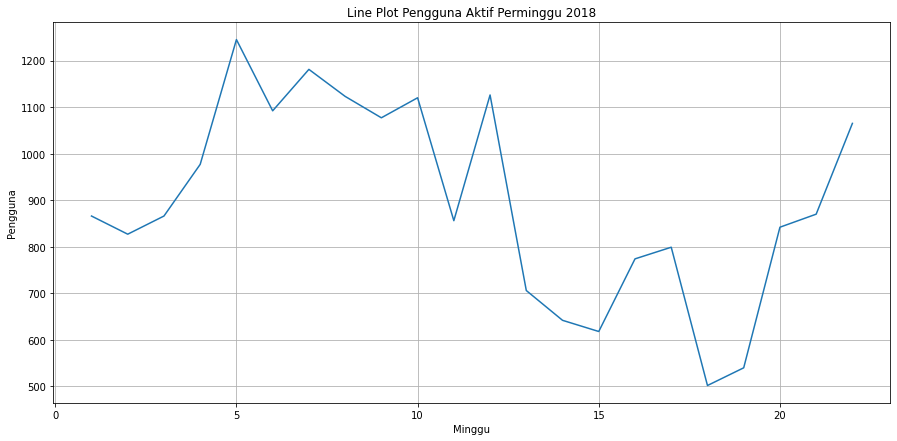

In [200]:
plt.figure(figsize=(15,7))
orders_2018.groupby(orders_2018['purchase_week'])['uid'].nunique().plot(grid=True)
plt.xlabel('Minggu')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Perminggu 2018')

Secara rata-rata jumlah pengguna aktif perminggu ialah 896 users. Berdasarkan grafik garis yang ditampilkan dapat diketahui
1. 10 minggu pertama, jumlah pengguna aktif relatif meningkat, walaupun terdapat 2 kali kejadian penurunan kecil 
2. minggu ke 10 hingga 15, jumlah pengguna aktif menurun curam, walaupun terdapat pernigkatan signifikan tetepi waktu berada di titik puncak relatif singkat
3. minggu ke 15 hingga 20 merupakan minggu dimana jumlah pengguna aktif perusahaan terendah yakni mencapai 500 pengguna

In [201]:
#pengguna aktif per bulan
mau_2018 = orders.groupby(['purchase_year','purchase_month']).agg({'uid':'nunique'}).mean()
int(mau_2018)

3155

Text(0.5, 1.0, 'Line Plot Pengguna Aktif Perbulan 2018')

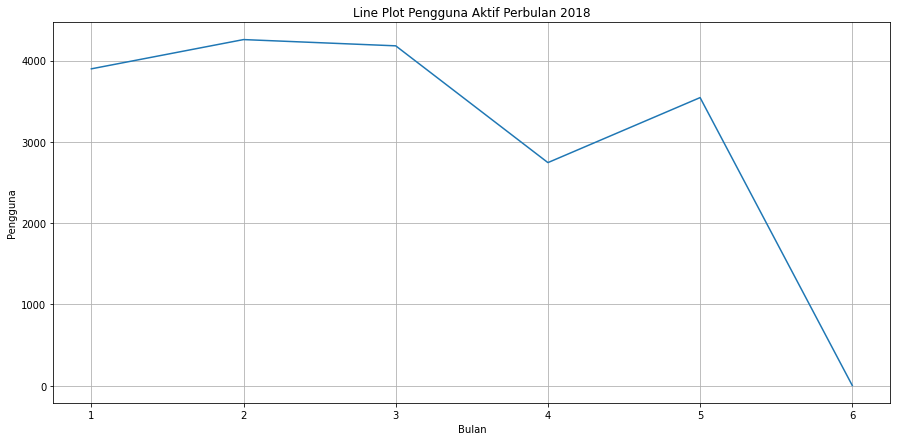

In [202]:
plt.figure(figsize=(15,7))
orders_2018.groupby(orders_2018['purchase_month'])['uid'].nunique().plot(grid=True)
plt.xlabel('Bulan')
plt.ylabel('Pengguna')
plt.title('Line Plot Pengguna Aktif Perbulan 2018')

Berbeda dengan trend pengguna aktif harian dan perminggu yang memiliki trend meningkat secara general. Pada grafik pengguna aktif perbulan dapat dilihat terjadi penurunan signikan yakni mencapai 0 penggua. Dalam hal ini harus diselidiki apa yang dilakukan oleh perusahaan khususnya pada bulan ke 5 hingga 6  

Kesimpulan secara keseluruhan dapat diketahui:
1. jumlah pengguna yang menggunakan produk perusahaan mengalami peningkatan di tahun 2018 sebesar kurang lebih 19,5% untuk kategori pengguna harian. Kemudian, hal serupa juga terjadi pada kategori pengguna mingguan dengan besar peningkatan kurang lebih 17%. 

2. jumlah pengguna untuk kategori bulanan mengalami sedikit penurunan sebesar 1.4% dari tahun 2017 

# Jumlah Sesi Perhari

In [203]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_day'] = visits['start_ts'].dt.date

In [204]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,2017-12-27


In [205]:
session_per_user = visits.groupby('session_day').agg({'uid':['count','nunique']})

session_per_user.columns = ['n_sessions','n_users']
session_per_user['sess_per_user'] = (session_per_user['n_sessions'] / session_per_user['n_users'])
session_per_user

,n_sessions,n_users,sess_per_user
session_day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


<AxesSubplot:xlabel='sess_per_user'>

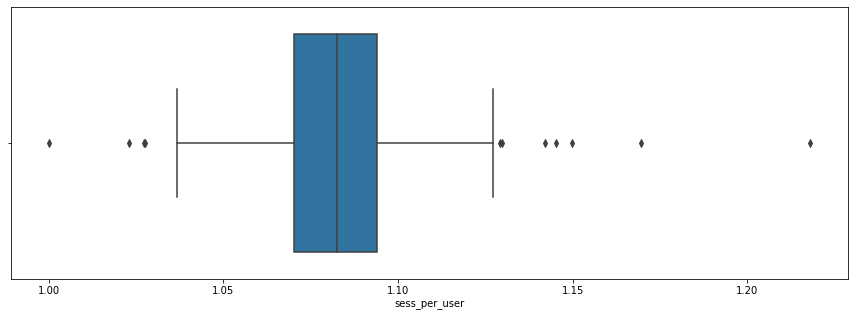

In [206]:
#sebaran sesi per hari 
plt.figure(figsize=(15,5))
sns.boxplot(data=session_per_user, x='sess_per_user')

Secara rata-rata, ternyata setiap pengguna menghabiskan paling banyak 1 sesi per hari untuk menggunakan produk perusahaan. Dengan demikian, kita bisa mengatakan bahwa produk perusahaan ini digunakan secara rutin.

In [207]:
desktop_user = visits.query('device=="desktop"') 
touch_user = visits.query('device=="touch"') 

In [208]:
desk_session_per_user = desktop_user.groupby('session_day').agg({'uid':['count','nunique']})

desk_session_per_user.columns = ['n_session','n_users']
desk_session_per_user['sess_per_user'] = (desk_session_per_user['n_session'] / desk_session_per_user['n_users'])
desk_session_per_user

,n_session,n_users,sess_per_user
session_day,,,
2017-06-01,501,455,1.101099
2017-06-02,498,458,1.087336
2017-06-03,329,307,1.071661
2017-06-04,349,326,1.070552
2017-06-05,693,631,1.098257
...,...,...,...
2018-05-27,426,385,1.106494
2018-05-28,835,738,1.131436
2018-05-29,751,690,1.088406


<AxesSubplot:ylabel='sess_per_user'>

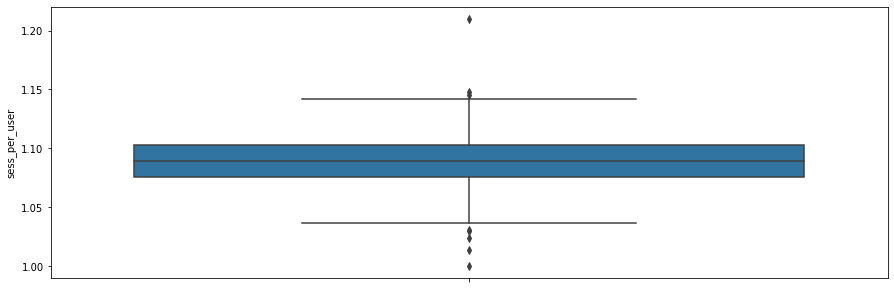

In [209]:
#sebaran sesi per hari khusus unutk device dekstop
plt.figure(figsize=(15,5))
sns.boxplot(data=desk_session_per_user, y='sess_per_user')

In [210]:
touch_session_per_user = touch_user.groupby('session_day').agg({'uid':['count','nunique']})

touch_session_per_user.columns = ['n_session','n_users']
touch_session_per_user['sess_per_user'] = (touch_session_per_user['n_session'] / touch_session_per_user['n_users'])
touch_session_per_user

,n_session,n_users,sess_per_user
session_day,,,
2017-06-01,163,153,1.065359
2017-06-02,160,152,1.052632
2017-06-03,148,139,1.064748
2017-06-04,161,153,1.052288
2017-06-05,200,195,1.025641
...,...,...,...
2018-05-27,246,236,1.042373
2018-05-28,321,303,1.059406
2018-05-29,284,263,1.079848


<AxesSubplot:ylabel='sess_per_user'>

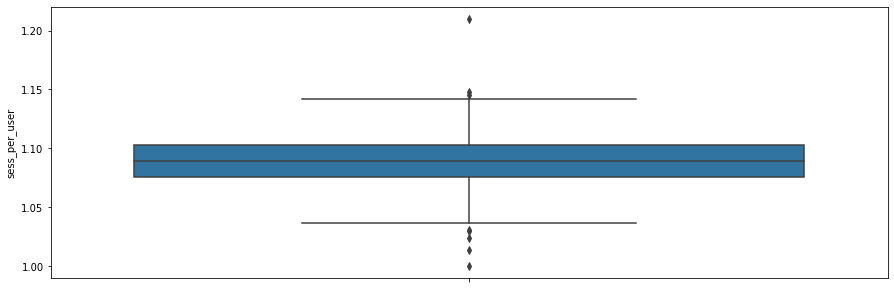

In [211]:
#sebaran sesi per hari khusus unutk device touch
plt.figure(figsize=(15,5))
sns.boxplot(data=desk_session_per_user, y='sess_per_user')

Secara rata-rata jumlah sesi yang dihabiskan pengguna menggunakan produk perusahaan baik menggunakan desktop dengan touch adalah sama yakni di 1 sesi per hari

# Lama Durasi Untuk Setiap Sesi

In [212]:
visits_2017 = visits.query('session_year==2017')
visits_2017

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,2017-12-20
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,2017-07-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,2017-09-03
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,2017-11-05
...,...,...,...,...,...,...,...,...
359391,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850,2017,6,2017-06-08
359392,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046,2017,11,2017-11-06
359393,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,2017-07-29
359396,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,2017-11-02


In [213]:
#lama durasi untuk tahun 2017 
visits_2017['ses_dur_sec'] = (visits_2017['end_ts'] - visits_2017['start_ts']).dt.seconds
visits_2017['ses_dur_sec'].mean()

/tmp/ipykernel_27/779842627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_2017['ses_dur_sec'] = (visits_2017['end_ts'] - visits_2017['start_ts']).dt.seconds


647.6953321455841

In [214]:
visits_2017['ses_dur_sec'].describe()

count    196450.000000
mean        647.695332
std        1012.315379
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: ses_dur_sec, dtype: float64

pada tahun 2017, rata-rata 1 pengguna menghabiskan waktunya selama 647.7 detik terhadap produk perusahaan

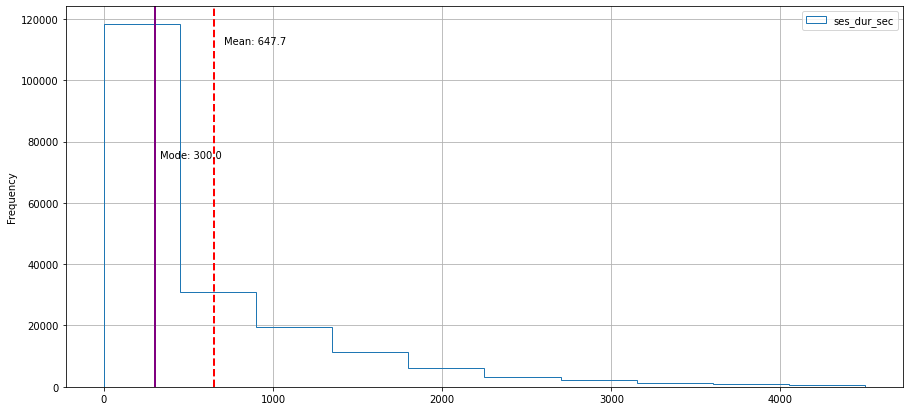

In [215]:
plt.figure(figsize=(15,7))
visits_2017['ses_dur_sec'].plot(kind='hist', y='ses_dur_ser', histtype='step', range=(0, 4500), grid=True, legend=True)
plt.axvline(visits_2017['ses_dur_sec'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(visits_2017['ses_dur_sec'].median(), color='purple', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(visits_2017['ses_dur_sec'].mean()*1.1, max_ylim*0.9, 
         'Mean: {:.1f}'.format(visits_2017['ses_dur_sec'].mean()))
plt.text(visits_2017['ses_dur_sec'].median()*1.1, max_ylim*0.6, 
         'Mode: {:.1f}'.format(visits_2017['ses_dur_sec'].median()))
plt.show()

Dikarenakan hasil sebaran data tidak menampilkan distribusi normal, maka untuk mencari berapa lama durasi pengguna yang digunakan untuk menggunakan produk adalah dengan menggunakan mode

In [216]:
visits_2017['ses_dur_sec'].mode()

0    60
dtype: int64

Secara rata-rata, pada tahun 2017 masing-masing pengguna menghabiskan waktu 647,7 detik. Namun ada hal yang menarik yaitu mayoritas waktu yang digunakan oleh pengguna dalam menggunakan produk perusahaan adalah 60 detik 

In [217]:
visits_2018 = visits.query('session_year==2018')
visits_2018

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_day
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,2018-02-19
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,2018-05-20
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,2018-01-30
11,desktop,2018-01-25 19:41:00,1,2018-01-25 19:37:00,7478054213403174082,2018,1,2018-01-25
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2,2018-02-06
...,...,...,...,...,...,...,...,...
359382,touch,2018-02-17 13:59:19,1,2018-02-17 13:59:00,18095050784131706696,2018,2,2018-02-17
359383,desktop,2018-03-25 11:52:19,3,2018-03-25 11:52:00,18115803853680559621,2018,3,2018-03-25
359387,desktop,2018-05-30 08:45:19,4,2018-05-30 08:45:00,18236711326069636433,2018,5,2018-05-30
359394,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,2018-01-25


In [218]:
#lama durasi untuk tahun 2018
visits_2018['ses_dur_sec'] = (visits_2018['end_ts'] - visits_2018['start_ts']).dt.seconds
visits_2018['ses_dur_sec'].mean()

/tmp/ipykernel_27/2502472901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_2018['ses_dur_sec'] = (visits_2018['end_ts'] - visits_2018['start_ts']).dt.seconds


637.4325797186833

In [219]:
visits_2018['ses_dur_sec'].describe()

count    162948.000000
mean        637.432580
std         978.427213
min           0.000000
25%          60.000000
50%         300.000000
75%         840.000000
max       30120.000000
Name: ses_dur_sec, dtype: float64

pada tahun 2018, rata-rata 1 pengguna menghabiskan waktunya selama 638.4 detik terhadap produk perusahaan

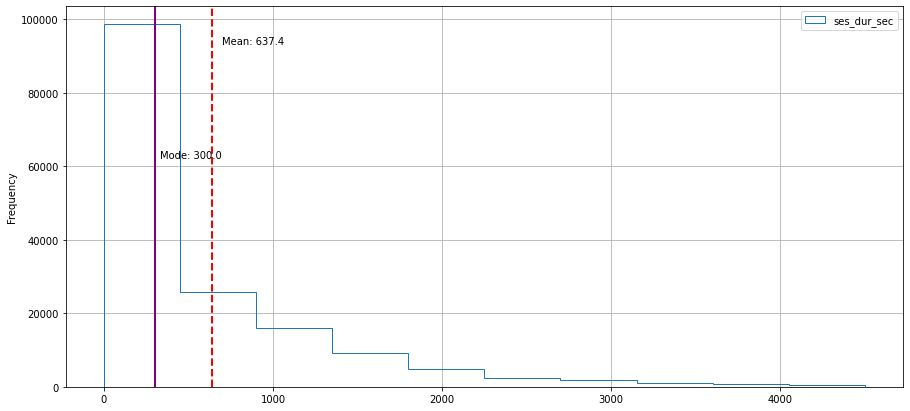

In [220]:
plt.figure(figsize=(15,7))
visits_2018['ses_dur_sec'].plot(kind='hist', y='ses_dur_ser', histtype='step', range=(0, 4500), grid=True, legend=True)
plt.axvline(visits_2018['ses_dur_sec'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(visits_2018['ses_dur_sec'].median(), color='purple', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(visits_2018['ses_dur_sec'].mean()*1.1, max_ylim*0.9, 
         'Mean: {:.1f}'.format(visits_2018['ses_dur_sec'].mean()))
plt.text(visits_2018['ses_dur_sec'].median()*1.1, max_ylim*0.6, 
         'Mode: {:.1f}'.format(visits_2018['ses_dur_sec'].median()))
plt.show()

Dikarenakan hasil sebaran data tidak menampilkan distribusi normal, maka untuk mencari berapa lama durasi pengguna yang digunakan untuk menggunakan produk adalah dengan menggunakan mode

In [221]:
visits_2018['ses_dur_sec'].mode()

0    60
dtype: int64

Secara rata-rata, pada tahun 2018 masing-masing pengguna menghabiskan waktu 637,7 detik. Namun ada hal yang menarik yaitu mayoritas waktu yang digunakan oleh pengguna dalam menggunakan produk perusahaan adalah 60 detik.

Secara keseluruhan rata-rata lama sesi pengguna di tahun 2018 mengalami penurunan 10 detik dibandingkan dengan tahun 2017

# Seberapa sering pengguna kembali untuk menggunakan produk?

In [222]:
sticky_factor_wau_2017 = dau_2017 / wau_2017 * 100
sticky_factor_wau_2017

uid    15.58238
dtype: float64

In [223]:
sticky_factor_mau_2017 = dau_2017 / mau_2017 * 100
sticky_factor_mau_2017

uid    3.705743
dtype: float64

Berdasarkan hasil perhitungan dapat diketahui bahwasanya terdapat 15.6% pengguna yang menggunakan kembali produk perusahaan tiap minggunya. sedangkan untuk perhitungan perbulan diketahui terdapat 3.7% pengguna yang kembali menggunakan produk perusahaan

In [292]:
sticky_factor_wau_2018 = dau_2018 / wau_2018 * 100
sticky_factor_wau_2018

uid    15.756586
dtype: float64

In [293]:
sticky_factor_mau_2018 = dau_2018 / mau_2018 * 100
sticky_factor_mau_2018

uid    4.474788
dtype: float64

Berdasarkan hasil perhitungan dapat diketahui bahwasanya terdapat 15.7% pengguna yang menggunakan kembali produk perusahaan tiap minggunya. sedangkan untuk perhitungan perbulan diketahui terdapat 4.5% pengguna yang kembali menggunakan produk perusahaan

# Perhitungan Metrik Untuk Penjualan

Hal yang akan dijawab untuk perhitungan metrik produk:
   1. Kapan orang-orang mulai melakukan pembelian?
   2. Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
   3. Berapa besaran rata-rata pembeliannya?
   4. Berapa jumlah uang yang mereka kontribusikan? (LTV)

# Kapan orang-orang mulai melakukan pembelian? 

In [224]:
#tanggal pembelian pertama
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = "first_order_date"

In [225]:
orders = orders.join(first_order_date,on='uid')

In [226]:
orders.sample()

,buy_ts,renevue,uid,purchase_year,purchase_month,purchase_week,purchase_date,first_order_date
719,2017-06-07 09:50:00,6.97,12052810096467869477,2017,6,23,2017-06-07,2017-06-07 09:50:00


In [227]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [228]:
orders.sample(3)

,buy_ts,renevue,uid,purchase_year,purchase_month,purchase_week,purchase_date,first_order_date,first_order_month,order_month
40648,2018-03-19 18:50:00,6.11,6191561135959121699,2018,3,12,2018-03-19,2018-03-19 18:50:00,2018-03-01,2018-03-01
12992,2017-10-16 10:50:00,1.83,16889290301545666137,2017,10,42,2017-10-16,2017-10-16 10:50:00,2017-10-01,2017-10-01
49235,2018-05-28 09:09:00,3.05,2259638638480130572,2018,5,22,2018-05-28,2018-02-20 17:40:00,2018-02-01,2018-05-01


In [229]:
visits_grouped = visits.groupby('uid')['start_ts'].min().reset_index()
visits_grouped.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [230]:
first_purchase = visits_grouped.merge(first_order_date, on='uid')
first_purchase.head()

,uid,start_ts,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [231]:
first_purchase['diff'] = first_purchase['first_order_date'] - first_purchase['start_ts']
first_purchase.head()

,uid,start_ts,first_order_date,diff
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


In [232]:
first_purchase['diff'].describe()

count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: diff, dtype: object

In [233]:
first_purchase['diff'].mode()

0   0 days 00:01:00
dtype: timedelta64[ns]

Berdasarkan perhitungan, secara rata-rata pelanggan melakukan pembelian produk perusahaan setelah 16 menit terpapar dengan iklan produk. Mayoritas dari pengguna perusahaan, melakukan pembelian produk setelah 1 menit melihat iklan perusahaan

# Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?

In [234]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359398 non-null  category      
 1   end_ts         359398 non-null  datetime64[ns]
 2   source_id      359398 non-null  int64         
 3   start_ts       359398 non-null  datetime64[ns]
 4   uid            359398 non-null  uint64        
 5   session_year   359398 non-null  int64         
 6   session_month  359398 non-null  int64         
 7   session_day    359398 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(3), object(1), uint64(1)
memory usage: 19.5+ MB


In [235]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50415 non-null  datetime64[ns]
 1   renevue            50415 non-null  float64       
 2   uid                50415 non-null  uint64        
 3   purchase_year      50415 non-null  int64         
 4   purchase_month     50415 non-null  int64         
 5   purchase_week      50415 non-null  int64         
 6   purchase_date      50415 non-null  object        
 7   first_order_date   50415 non-null  datetime64[ns]
 8   first_order_month  50415 non-null  datetime64[ns]
 9   order_month        50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3), object(1), uint64(1)
memory usage: 3.8+ MB


In [236]:
orders['first_order_month'].head()

0   2017-06-01
1   2017-06-01
2   2017-06-01
3   2017-06-01
4   2017-06-01
Name: first_order_month, dtype: datetime64[ns]

In [237]:
orders_per_uid = orders.pivot_table(index='first_order_month',columns='order_month',values='uid',aggfunc='nunique')
orders_per_uid

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


Text(0.5, 1.0, 'Jumlah Pembelian Per Pelanggan')

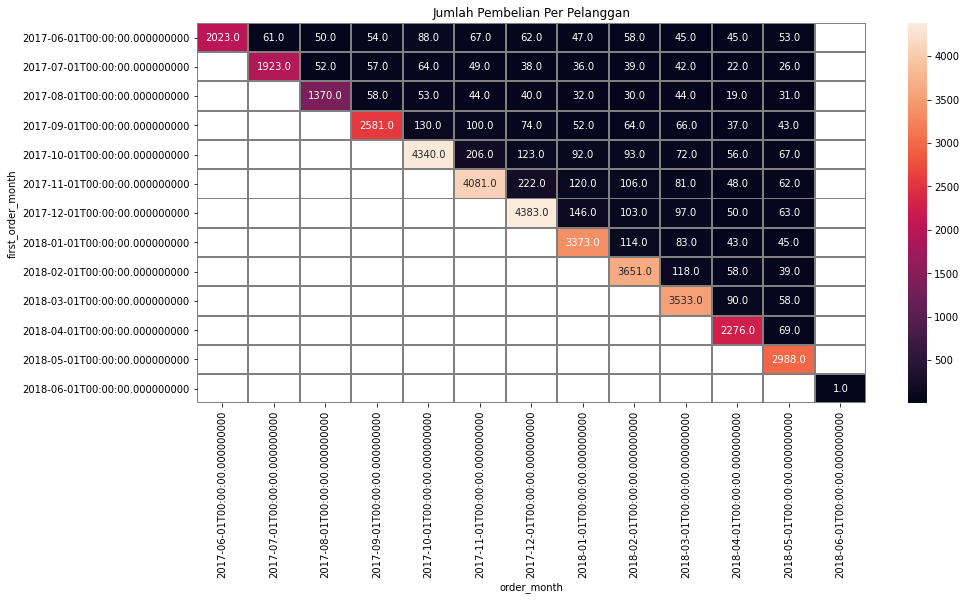

In [238]:
plt.figure(figsize=(15,7))
sns.heatmap(orders_per_uid, annot=True, fmt='.1f', linewidth=1, linecolor='gray')
plt.title('Jumlah Pembelian Per Pelanggan')

kesimpulan yang dapat diperoleh 
1. Jumlah permintaan dalam kohort menurun setelah bulan pertama.
2. Di beberapa kohort, jumlah permintaan terkadang menunjukkan peningkatan.
3. Sebagian besar jumlah permintaan di kohort meningkat pada bulan Juli 2018. 

# Berapa besaran rata-rata pembeliannya?

In [239]:
#mengelompokan data yang kita miliki berdasarkan kohort first_order_month dan berdasarkan order_month
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'renevue':'sum', 'uid':'nunique'})
orders_grouped_by_cohorts.head()

renevue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

In [240]:
#perbaikan penulisan nama kolom 
orders = orders.rename(columns={'renevue':'revenue'})
orders_grouped_by_cohorts = orders_grouped_by_cohorts.rename(columns={'renevue':'revenue'})

In [241]:
#mencari pendapatan rata-rata untuk tiap uid
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'])
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

In [242]:
#menyusun sebuah pivot table yang bisa menunjukkan perubahan pendapatan per pengguna untuk setiap kohort berdasarkan bulan dilakukannya pemesanan
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='order_month', values='revenue_per_user', aggfunc='mean')
orders_grouped_by_cohorts_pivot.head()

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN


In [243]:
#mencari siklus hidup cohorts
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['order_month']-orders_grouped_by_cohorts['first_order_month'])
orders_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [244]:
#konversi tipe data timedelta64 dalam cohort_lifetime untuk mengetahui besar bulan antar first_order dengan order_month
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'].head()

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64

In [245]:
#membulatkan dan menjadikan tipe data int untuk hasil pecahan cohort_lifetime yang sudah dikonversi
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [246]:
print(orders_grouped_by_cohorts[['first_order_month', 'order_month', 'cohort_lifetime']].head())

print(orders_grouped_by_cohorts[['first_order_month', 'order_month', 'cohort_lifetime']].tail())

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0
78        2018-06-01  2018-06-01                0


In [247]:
#mengubah tipe datetime mejadi string dalam format date
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

0     2017-06
1     2017-06
2     2017-06
3     2017-06
4     2017-06
       ...   
74    2018-03
75    2018-04
76    2018-04
77    2018-05
78    2018-06
Name: first_order_month, Length: 79, dtype: object

In [248]:
#menyusun sebuah pivot table yang menunjukkan perubahan pendapatan rata-rata per pengguna
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user', aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Besar Rata-Rata Pembelian Per User ')

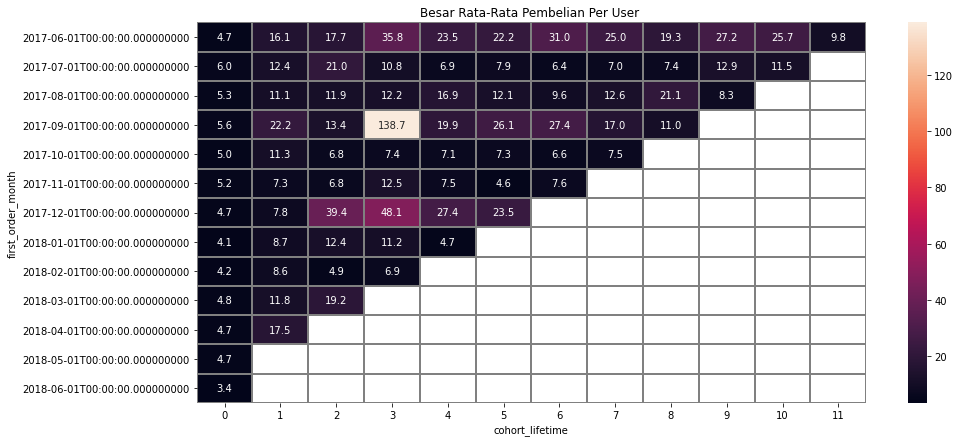

In [249]:
plt.figure(figsize=(15,7))
sns.heatmap(revenue_per_user_pivot,annot=True, fmt='.1f', linewidth=1, linecolor='gray')
plt.title('Besar Rata-Rata Pembelian Per User ')

Kesimpulan yang diperoleh 
1. Rata-rata pembelian produk perusahaan per pelanggan mayoritas tidak lebih dari 20 
2. Pada bulan September 2017, merupakan pembelian tertinggi sepanjang catatan orders perusahaan yakni mencapai 130 pembelian
3. Pada bulan Juni 2018, merupakan pembelian terendah sepanjang catatan orders perusahaan yakni hanya 3 pembelian
4. Setiap bulan pertama order month, jumlah pembalian mengalami peningkatan

# Berapa jumlah uang yang mereka kontribusikan? (LTV)

In [250]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50415 non-null  datetime64[ns]
 1   revenue            50415 non-null  float64       
 2   uid                50415 non-null  uint64        
 3   purchase_year      50415 non-null  int64         
 4   purchase_month     50415 non-null  int64         
 5   purchase_week      50415 non-null  int64         
 6   purchase_date      50415 non-null  object        
 7   first_order_date   50415 non-null  datetime64[ns]
 8   first_order_month  50415 non-null  datetime64[ns]
 9   order_month        50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3), object(1), uint64(1)
memory usage: 3.8+ MB


In [251]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [252]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [253]:
first_orders_grouped = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders_grouped.columns = ['uid','first_orders_month_grouped']

In [254]:
cohort_sizes = first_orders_grouped.groupby('first_orders_month_grouped').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_orders_month_grouped', 'n_buyers']

In [255]:
orders_ = pd.merge(orders, first_orders_grouped, on='uid')

In [256]:
cohorts = orders_.groupby(['first_orders_month_grouped', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [257]:
report = pd.merge(cohort_sizes, cohorts, on='first_orders_month_grouped')

In [258]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   first_orders_month_grouped  79 non-null     datetime64[ns]
 1   n_buyers                    79 non-null     int64         
 2   order_month                 79 non-null     datetime64[ns]
 3   revenue                     79 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 3.1 KB


In [259]:
report['gp'] = report['revenue'] 
report['age'] = (
    report['order_month'] - report['first_orders_month_grouped']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [260]:
report['ltv'] = (report['gp'] / report['n_buyers']).astype('float')

In [261]:
result = report.pivot_table(index='first_orders_month_grouped', columns='age', values='ltv', aggfunc='mean').round()

In [262]:
result = result.fillna('')

In [263]:
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month_grouped,,,,,,,,,,,,
2017-06-01,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2017-07-01,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,6.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,,,
2017-10-01,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,5.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,5.0,0.0,1.0,1.0,0.0,0.0,,,,,,
2018-01-01,4.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,4.0,0.0,0.0,0.0,,,,,,,,


In [264]:
 #LTV dari kohort pertama dengan menjumlahkan nilai untuk setiap bulan:
ltv_201706 = result.loc['2017-06-01'].sum()
ltv_201706 

13.0

Secara rata-rata, setiap pelanggan dari kohort pertama berkontribusi atas pendapatan sebesar $13 selama dua belas bulan siklus hidup mereka.

# Perhitungan Metrik Untuk Penjualan
Hal yang akan dijawab untuk perhitungan metrik produk:

Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

Berapa biaya akuisisi pelanggan dari masing-masing sumber?

Seberapa menguntungkannya investasi tersebut? (ROI)

# Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

In [265]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   month      2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [266]:
costs = costs.rename(columns={'month':'dt_month'})

In [267]:
costs['dt_week'] = costs['dt'].dt.week
costs['dt_year'] = costs['dt'].dt.year

/tmp/ipykernel_27/3111122084.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs['dt_week'] = costs['dt'].dt.week


In [268]:
costs.head()

,source_id,dt,costs,dt_month,dt_week,dt_year
0,1,2017-06-01,75.20,2017-06-01,22,2017
1,1,2017-06-02,62.25,2017-06-01,22,2017
2,1,2017-06-03,36.53,2017-06-01,22,2017
3,1,2017-06-04,55.00,2017-06-01,22,2017
4,1,2017-06-05,57.08,2017-06-01,23,2017


In [269]:
total_costs = costs['costs'].sum()
total_costs

329131.62

In [270]:
total_costs_per_source = costs.groupby('source_id')['costs'].sum()
total_costs_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [271]:
#untuk menampilkan biaya yang dikeluarkan untuk setiap hari 
costs_daily_pivot = costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum')
costs_daily_pivot.head()

source_id,1,2,3,4,5,9,10
dt,,,,,,,
2017-06-01,75.20,132.56,349.38,76.74,73.24,13.06,15.08
2017-06-02,62.25,132.38,314.22,59.21,123.82,18.13,11.18
2017-06-03,36.53,77.20,196.12,59.39,64.93,7.06,9.62
2017-06-04,55.00,79.08,389.87,161.97,52.77,4.65,17.82
2017-06-05,57.08,108.96,424.47,44.65,144.30,15.30,26.68


Text(0.5, 1.0, 'Total Costs Per Hari')

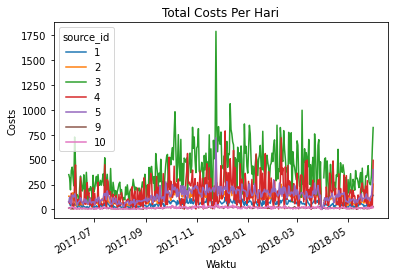

In [272]:
costs_daily_pivot.plot(kind='line')
plt.xlabel('Waktu')
plt.ylabel('Costs')
plt.title('Total Costs Per Hari')

In [273]:
#untuk menampilkan biaya yang dikeluarkan untuk setiap minggu 
costs_weekly_pivot = costs.pivot_table(index='dt_week', columns='source_id', values='costs', aggfunc='sum')
costs_weekly_pivot.head()

source_id,1,2,3,4,5,9,10
dt_week,,,,,,,
1,514.78,903.67,3851.52,1220.40,1279.04,129.61,168.79
2,391.21,978.00,2984.59,1034.01,1210.86,133.13,123.25
3,462.91,899.27,3576.49,1593.86,1167.33,106.08,107.80
4,503.70,870.18,2888.44,1446.04,1168.41,118.19,179.16
5,598.16,1172.65,3606.28,1079.21,1405.40,147.08,121.79


Text(0.5, 1.0, 'Total Costs Per Minggu')

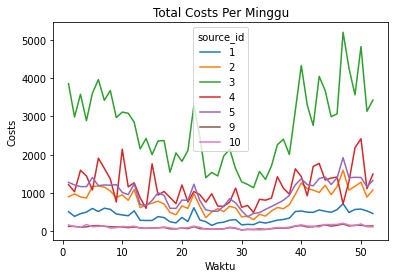

In [274]:
costs_weekly_pivot.plot(kind='line')
plt.xlabel('Waktu')
plt.ylabel('Costs')
plt.title('Total Costs Per Minggu')

In [275]:
#untuk menampilkan biaya yang dikeluarkan untuk setiap bulan 
costs_monthly_pivot = costs.pivot_table(index='dt_month', columns='source_id', values='costs', aggfunc='sum')
costs_monthly_pivot.head()

source_id,1,2,3,4,5,9,10
dt_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


Text(0.5, 1.0, 'Total Costs Per Bulan')

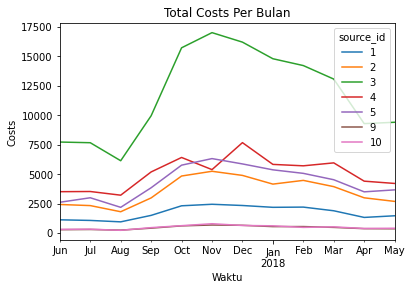

In [276]:
costs_monthly_pivot.plot(kind='line')
plt.xlabel('Waktu')
plt.ylabel('Costs')
plt.title('Total Costs Per Bulan')

In [277]:
mean_total_costs = costs['costs'].mean()
mean_total_costs

129.47742722265932

Kesimpulan:
  1. total biaya pemasaran yang dikeluarkan oleh perusahaan adalah 329131.62
  2. source_id 3 selalu memliki pengeluaran pemasaran yang tinggi baik dilihat dalam periode hari, minggu dan bulan
  3. bulan november tercatat memutuhkan biaya pemasaran yang paling tinggi
  4. rata-rata pengeluaran tim pemasaran perusahaan ialah 129.47

# Berapa biaya akuisisi pelanggan dari masing-masing sumber?

In [278]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   first_orders_month_grouped  79 non-null     datetime64[ns]
 1   n_buyers                    79 non-null     int64         
 2   order_month                 79 non-null     datetime64[ns]
 3   revenue                     79 non-null     float64       
 4   gp                          79 non-null     float64       
 5   age                         79 non-null     int64         
 6   ltv                         79 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 4.9 KB


In [279]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   dt_month   2542 non-null   datetime64[ns]
 4   dt_week    2542 non-null   int64         
 5   dt_year    2542 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 119.3 KB


In [280]:
report_cost = report.merge(costs, left_on='order_month', right_on='dt_month')
report_cost.head()

,first_orders_month_grouped,n_buyers,order_month,revenue,gp,age,ltv,source_id,dt,costs,dt_month,dt_week,dt_year
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1,2017-06-01,75.20,2017-06-01,22,2017
1,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1,2017-06-02,62.25,2017-06-01,22,2017
2,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1,2017-06-03,36.53,2017-06-01,22,2017
3,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1,2017-06-04,55.00,2017-06-01,22,2017
4,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1,2017-06-05,57.08,2017-06-01,23,2017


In [281]:
report_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16445
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   first_orders_month_grouped  16446 non-null  datetime64[ns]
 1   n_buyers                    16446 non-null  int64         
 2   order_month                 16446 non-null  datetime64[ns]
 3   revenue                     16446 non-null  float64       
 4   gp                          16446 non-null  float64       
 5   age                         16446 non-null  int64         
 6   ltv                         16446 non-null  float64       
 7   source_id                   16446 non-null  int64         
 8   dt                          16446 non-null  datetime64[ns]
 9   costs                       16446 non-null  float64       
 10  dt_month                    16446 non-null  datetime64[ns]
 11  dt_week                     16446 non-null  int64     

In [282]:
report_cost['cac'] = report_cost['costs'] / report_cost['n_buyers']

In [283]:
report_cost['cac'].describe()

count    16446.000000
mean         0.055833
std          0.074371
min          0.000160
25%          0.009251
50%          0.030822
75%          0.071194
max          1.305314
Name: cac, dtype: float64

In [284]:
cac_source = report_cost.groupby('source_id')['cac'].sum()
cac_source

source_id
1      58.356930
2     119.268018
3     394.577150
4     169.708680
5     144.748040
9      15.375865
10     16.191571
Name: cac, dtype: float64

Biaya yang dibutuhkan untuk menarik pelanggan baru tertinggi ialah source 3 dengan total kebutuhan 394.58 

In [285]:
ltv_source = report_cost.groupby('source_id')['ltv'].sum()
ltv_source

source_id
1     2644.895685
2     2644.895685
3     2644.895685
4     2644.895685
5     2653.524329
9     2644.895685
10    2644.895685
Name: ltv, dtype: float64

In [286]:
#rata-rata cac
print('Rata-rata CAC',report_cost['cac'].mean())

#rata-rata ltV
print('Rata-rata LTV',report_cost['ltv'].mean())

Rata-rata CAC 0.05583280149275519
Rata-rata LTV 1.1262859321064351


Biaya rata-rata yang dikeluarkan perusahaan untuk menarik setiap pelanggan mencapai 0.056. Sementara itu, setiap pelanggan menyumbangkan pendapatan hingga sebesar 1.126. Dengan demikian, investasi yang dikeluarkan perusahaan untuk mengakuisisi pelanggan terbukti efektif dan bahkan menghasilkan keuntungan.

# Seberapa menguntungkannya investasi tersebut? (ROI)

ROI = (laba bersih − investasi) / investasi
laba bersih = laba operasional - pajak dan pinjaman 
laba operasional = laba kotor - biaya operasional 
laba kotor = pendapatan kotor - biaya utama 

In [287]:
revenue_source_grouped =  report_cost.groupby('source_id')['revenue'].sum().reset_index()
revenue_source_grouped

,source_id,revenue
0,1,7619461.92
1,2,7619461.92
2,3,7619461.92
3,4,7619461.92
4,5,7648296.51
5,9,7619461.92
6,10,7619461.92


In [288]:
costs_source_grouped = report_cost.groupby('source_id')['costs'].sum().reset_index()
costs_source_grouped

,source_id,costs
0,1,143247.32
1,2,292631.43
2,3,968277.82
3,4,415948.36
4,5,354919.00
5,9,37649.67
6,10,39621.52


In [289]:
roi_data =  revenue_source_grouped.merge(costs_source_grouped, on='source_id')
roi_data

,source_id,revenue,costs
0,1,7619461.92,143247.32
1,2,7619461.92,292631.43
2,3,7619461.92,968277.82
3,4,7619461.92,415948.36
4,5,7648296.51,354919.00
5,9,7619461.92,37649.67
6,10,7619461.92,39621.52


In [290]:
roi_data['roi_per_source'] = (roi_data['revenue'] - roi_data['costs']) / roi_data['costs']
roi_data

,source_id,revenue,costs,roi_per_source
0,1,7619461.92,143247.32,52.190956
1,2,7619461.92,292631.43,25.037743
2,3,7619461.92,968277.82,6.869086
3,4,7619461.92,415948.36,17.318288
4,5,7648296.51,354919.00,20.549414
5,9,7619461.92,37649.67,201.377920
6,10,7619461.92,39621.52,191.306149


<AxesSubplot:>

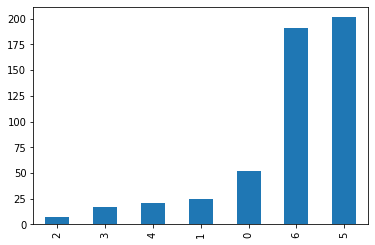

In [291]:
roi_data['roi_per_source'].sort_values().plot(kind='bar')

berdasarkan diagram diatas dapat diketahui bahwa seluruh investasi yang ditanamkan oleh perusahaan untuk tiap source_id telah mengembalikan modal, akan tetapi besar pengembalian yang diperoleh tertinggi ialah di source_id 6 dan 7 dengan nilai diatas 175% dan tingkat pengembalian terendah ialah source_id 2 denhgan nilai dibawah 25%

# Kesimpulan Keseluruhan 

# Persiapan Datasets

1. terdapat 3 data yang terlibat dalam pengolahan data yakni data visits, orders dan costs
2. ketiga datasets tidak memiliki missing value dan duplikasi 
3. terdapat anomali pada datasets visits dimana nilai End Ts lebih kecil dibandingkan nilai Start Ts
4. ketiga datasets memiliki format penulisan nama kolom yang tidak beraturan
5. semua datasets memiliki beberapa kolom yang memiliki tipe data yang tidak sesuai 

# Perhitungan Metrik
- perhitungan metrik produk
1. rata-rata jumlah pengguna produk harian pada tahun 2017 adalah 118 pengguna dan tahun 2018 adalah 141 orang
2. rata-rata jumlah pengguna produk mingguan pada tahun 2017 adalah 760 pengguna dan tahun 2018 adalah 896 orang
3. rata-rata jumlah pengguna produk bulanan pada tahun 2017 adalah 3199 pengguna dan tahun 2018 adalah 3155 orang
4. rata-rata pengguna menghabiskan 1 sesi setiap harinya baik di tahun 2017 maupun 2018
5. lama rata-rata pengguna menghabiskan waktu dalam 1 kali sesi ialah diatas 600 detik untuk kedua tahun 
6. pada tahun 2017, terdapat 15.6% pengguna yang menggunakan kembali produk perusahaan tiap minggunya dan sebesar 3.7% untuk tiap bulannya 
7. pada tahun 2018, terdapat 15.7% pengguna yang menggunakan kembali produk perusahaan tiap minggunya dan sebesar 4.5% untuk tiap bulannya

- perhitungan metrik penjualan
1. mayoritas pengguna melakukan pembelian produk setelah 1 menit melihat, akan tetapi secara rata-rata pengguna melakukan purchasing setelah 16 menit melihat produk
2. jumlah permintaan dalam kohort menurun setelah bulan pertama.
3. di beberapa kohort, jumlah permintaan terkadang menunjukkan peningkatan.
4. sebagian besar jumlah permintaan di kohort meningkat pada bulan Juli 2018. 
5. rata-rata pembelian produk perusahaan per pelanggan mayoritas tidak lebih dari 20 
6. pada bulan September 2017, merupakan pembelian tertinggi sepanjang catatan orders perusahaan yakni mencapai 130 pembelian
7. pada bulan Juni 2018, merupakan pembelian terendah sepanjang catatan orders perusahaan yakni hanya 3 pembelian
8. jumlah uang yang diberikan pengguna ke perusahaan tiap bulannya secara garis besar mengalami penuruan
9. besar jumlah uang kohort pertama berkontirbusi dalam 1 tahun ialah $13

- perhitungan metrik pemasaran
1. total biaya pemasaran yang dikeluarkan oleh perusahaan adalah 329131.62 dan rata-rata pengeluaran tim pemasaran perusahaan ialah 129.47
2. source_id 3 selalu memliki pengeluaran pemasaran yang tinggi baik dilihat dalam periode hari, minggu dan bulan
3. bulan november tercatat memutuhkan biaya pemasaran yang paling tinggi
4. biaya rata-rata yang dikeluarkan perusahaan untuk menarik setiap pelanggan mencapai 0.056 dan setiap pelanggan menyumbangkan pendapatan hingga sebesar 1.126.
5. source_id 6 dan 5 memiliki roi tertinggi yanki diatas 175% dan source_id 2 memiliki roi terendah yakni dibawah 25%